In [ ]:
import pickle
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import math
from scipy.optimize import fmin_cobyla
from dnapuzzle import Puzzle
import random
from toolsForPuzzle import *
from sympy import *
infile = open('/home/mcb/users/yzhu415/7_July_data_distance_annotated.pickle','rb')
data = pickle.load(infile)
infile.close()



In [4]:
save={i:puzzles[i] for i in keys[1600000:1700000]}
pickle.dump( save, open( "/home/mcb/users/yzhu415/7_July_data_distance_annotated.pickle", "wb" ) )

1709837

In [2]:
resetPareto(data)
puzzles=classifyBypuzzles(data)

In [38]:
puzzles={}
players={}
for i in data:
    puzzles.setdefault(i['originalCode'],[]).append(i)
    for p in i['playerIDs']:
        players.setdefault(p,[]).append(i)

In [39]:
remove=[]
for p in puzzles:
    best=False
    for i in puzzles[p]:
        if i['pareto']=='Best':
            best=True
            break
    if not best:
        remove.append(p)
for i in remove:
    del puzzles[i]

In [6]:
oneplay=[players[i][0] for i in players if len(players[i])==1]
bestone=[i for i in oneplay if i['pareto']=='Best']
percOfBestWoneplay=len(bestone)/len(oneplay)

In [7]:
percOfBestWoneplay

0.10142423842806277

In [40]:
def getplayerdistance(numberOfplay):
    playersample=[i for i in players if len(players[i])>numberOfplay]
    result=[]
    for sample in random.sample(playersample, 50000):
        distances=[]
        for puzzle in players[sample]:
            if puzzle['pareto']=='Best':
                distances.append(0.0)
                continue

            if puzzles.get(puzzle['originalCode']):
                minDistance=float('inf')
                for p in puzzles[puzzle['originalCode']]:
                    if p['pareto']=='Best':
                        dist=(p['score']-puzzle['score'])**2+(p['nGaps']-puzzle['nGaps'])**2
                        if dist < minDistance :
                            minDistance=dist
                distances.append(0.0-math.sqrt(minDistance))

        if len(distances)!=0:
            result.append((sample ,sum(distances)/len(distances)))
    return result

In [20]:
result=getplayerdistance(20)

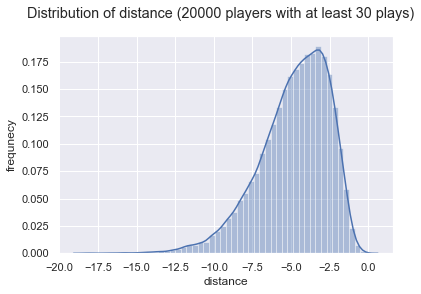

In [21]:
def playerdistancedistribution(result,numberOfplay):
    df=pd.DataFrame(result, columns =['ID','distance'])
    sns.distplot(df['distance']).set(ylabel="frequnecy")
    plt.suptitle('Distribution of distance (20000 players with at least %s plays)' % numberOfplay)

playerdistancedistribution(result,30)

In [4]:
def getpuzzledistance(numberOfplay):
    result=[]
    puzzlesamples=[i for i in puzzles if len(puzzles[i])>numberOfplay]
    puzzleCode=random.choice(puzzlesamples)
    optimals=[]
    for p in puzzles[puzzleCode]:
        if p['pareto']=='Best':
            result.append((p["score"],p["nGaps"],p["pareto"],0.0, 105))
            optimals.append(p)
    for p in puzzles[puzzleCode]:
        if p['pareto']!='Best':
            
            minDistance=float('inf')
            for opt in optimals:
                dist=(p['score']-opt['score'])**2+(p['nGaps']-opt['nGaps'])**2
                if dist < minDistance :
                    minDistance=dist
            if p['pareto']=='True':
                result.append((p["score"],p["nGaps"],p["pareto"],0.0-math.sqrt(minDistance),75))
            else:
                result.append((p["score"],p["nGaps"],p["pareto"],0.0-math.sqrt(minDistance),25))


    return result
    

In [15]:
result=getpuzzledistance(35)

df=pd.DataFrame(result, columns =["score","nGaps","pareto","distance","size"])

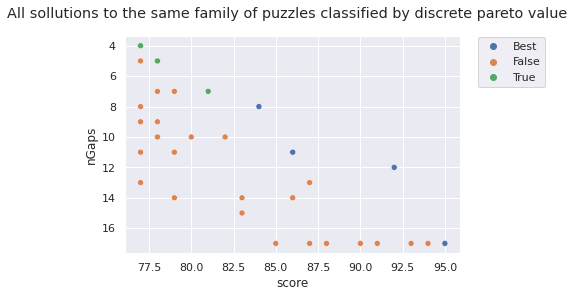

In [17]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
#sns.scatterplot(data=df,x="score",y="nGaps",style=df['pareto'],hue=df["distance"],palette=cmap).invert_yaxis()
sns.scatterplot(data=df,x="score",y="nGaps",sizes=(50, 150),hue=df["pareto"]).invert_yaxis()

plt.suptitle('All sollutions to the same family of puzzles classified by discrete pareto value')
plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.1)




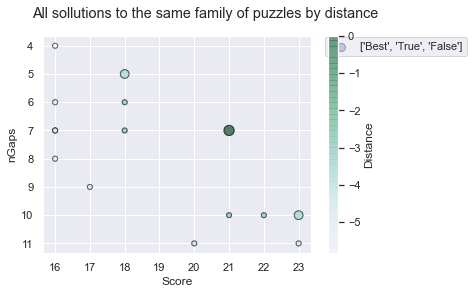

In [44]:

points=plt.scatter(df['score'],df['nGaps'],c=df["distance"],s=df["size"], edgecolors="black",cmap="BuGn",alpha=0.3,label=["Best","True","False"])
points.axes.invert_yaxis()
plt.colorbar(points).set_label('Distance')
plt.suptitle('All sollutions to the same family of puzzles by distance')
plt.xlabel('Score')
plt.ylabel('nGaps')



plt.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.1)




Text(0, 0.5, 'nGaps')

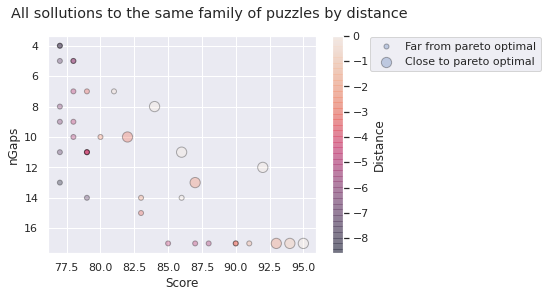

In [19]:
best=df[df["distance"]>-3]

false=df[df["distance"]<=-3]
f=plt.scatter(false['score'],false['nGaps'],c=false["distance"],s=25, edgecolors="black",alpha=0.3, label='Far from pareto optimal')
plt.scatter(best['score'],best['nGaps'],c=best["distance"],s=105, edgecolors="black",alpha=0.3,label='Close to pareto optimal')
plt.gca().invert_yaxis()

plt.clim(0, min(df["distance"]))
plt.colorbar().set_label('Distance')
plt.legend(bbox_to_anchor=(1.2, 1),loc=2, borderaxespad=0.1)
plt.suptitle('All sollutions to the same family of puzzles by distance')
plt.xlabel('Score')
plt.ylabel('nGaps')
